In [29]:
import pandas as pd

motor = pd.read_csv('03_10/VIB_0310_motor_51200.csv',sep = '\t', encoding = 'cp949',names=['time','motor'])
pump = pd.read_csv('03_10/VIB_0310_pump_51200.csv',sep = '\t', encoding = 'cp949',names=['time_dummy','motor'])

In [30]:
motor.head(5)

,time,motor
0,2022-03-10 오전 9:55:29,0.560187
1,2022-03-10 오전 9:55:29,1.423991
2,2022-03-10 오전 9:55:29,-1.454646
3,2022-03-10 오전 9:55:29,2.120655
4,2022-03-10 오전 9:55:29,-1.437091


In [31]:
combined = pd.concat([motor,pump], ignore_index=False,axis = 1)

In [32]:
combined.head(5)

,time,motor,time_dummy,motor
0,2022-03-10 오전 9:55:29,0.560187,2022-03-10 오전 9:55:29,1.988296
1,2022-03-10 오전 9:55:29,1.423991,2022-03-10 오전 9:55:29,-1.985625
2,2022-03-10 오전 9:55:29,-1.454646,2022-03-10 오전 9:55:29,-0.822700
3,2022-03-10 오전 9:55:29,2.120655,2022-03-10 오전 9:55:29,-3.767544
4,2022-03-10 오전 9:55:29,-1.437091,2022-03-10 오전 9:55:29,1.287651


In [34]:
combined = combined.drop(['time_dummy'], axis=1)

In [ ]:
combined.to_csv("data.csv", index=False)

C:\Users\DeepLearning_3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


center 0 : [0, 0]
center 1 : [1.5, 0]


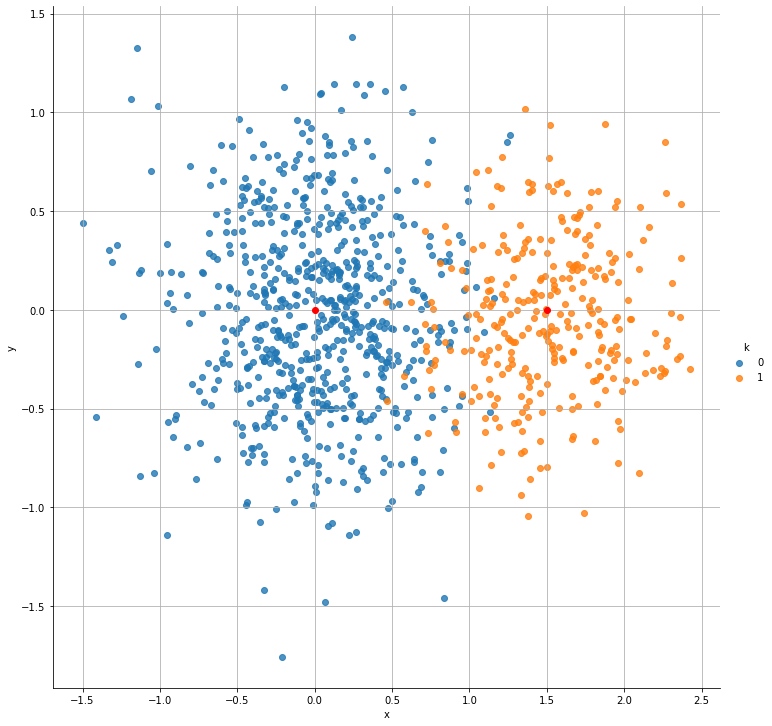

In [1]:
# 장난감 데이터 생성
import numpy as np

# seed 설정으로 동일한 난수 재연
np.random.seed(0)

# 데이터 수는 1,000개
num_points = 1000
vector_set = []

# 중심
center = [[0, 0], [1.5, 0]]

# 1,000개의 좌표를 2개 그룹으로 랜덤 생성
for i in range(num_points):
    if np.random.random() > 0.3:
        vector_set.append([np.random.normal(center[0][0], 0.5), np.random.normal(center[0][1], 0.5), 0])
    else:
        vector_set.append([np.random.normal(center[1][0], 0.4), np.random.normal(center[1][1], 0.4), 1])
        
# 데이터 가시화
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

data0 = {"x": [], "y": [], "k": []}
for i in range(num_points):
    data0["x"].append(vector_set[i][0])
    data0["y"].append(vector_set[i][1])
    data0["k"].append(vector_set[i][2])
    
df0 = pd.DataFrame(data0)
sns.lmplot("x", "y", data = df0, fit_reg = False, hue = "k", height = 10, legend = True)

# 중심 참조점
for i in range(len(center)):
    plt.plot(center[i][0], center[i][1], "ro")
    print("center", i, ":", center[i])
    
plt.grid(True)
plt.show()

In [5]:
# 텐서플로
import tensorflow as tf

num_steps = 5

# 상수 텐서 생성
vectors = tf.constant(vector_set)

# 2개의 중심
k = 2

# 새로운 중심
centroids = tf.Variable(tf.slice(tf.random.shuffle(vectors), [0, 0], [k, -1]))

# 계산을 위한 디멘션 통일
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)

assignments = tf.argmin(tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroids)), 2), 0)
means = tf.concat(axis = 0, values = [tf.reduce_mean(
                                            tf.gather(vectors,
                                                tf.reshape(
                                                    tf.where(
                                                        tf.equal(assignments, c)
                                                    ), [1, -1])
                                            ), axis = [1])
                                        for c in range(k)])

update_centroids = centroids.assign(means)
init_op = tf.global_variables_initializer()

# 
sess = tf.Session()
sess.run(init_op)

for step in range(num_steps):
    _, centroid_values, assignment_values = sess.run([update_centroids, centroids, assignments])

data1 = {"x": [], "y": [], "k": []}
for i in range(num_points):
    data1["x"].append(vector_set[i][0])
    data1["y"].append(vector_set[i][1])
    data1["k"].append(assignment_values[i])
df1 = pd.DataFrame(data1)
sns.lmplot("x", "y", data = df1, fit_reg = False, height = 10, hue = "k", legend = True)

# 추정된 중심
for i in range(k):
    plt.plot(centroid_values[i][0], centroid_values[i][1], "ro")
    print("Centroid", i, ": [", centroid_values[i][0], ",", centroid_values[i][1], "]")
    
plt.grid(True)
plt.show()

AttributeError: module 'tensorflow' has no attribute 'Session'